In [3]:
"""
Created on Wed Nov  1 08:13:46 2023

@author: sophie


To create figure showing before and after star subtraction for finished products. 
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap
from astropy.io import fits
from astropy.visualization import simple_norm, ZScaleInterval, LinearStretch, ImageNormalize, ManualInterval, PercentileInterval
from astropy.convolution import Gaussian2DKernel
from astropy.convolution import convolve

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig_width_pt = 240.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches

In [2]:
dates_on_laptop = ['2019-12-31', '2020-02-02', '2020-02-04', '2020-02-16', 
         '2020-02-25', '2020-02-28', '2020-03-16', '2020-03-19']
dates_on_hardrive = ['2019-11-14', '2019-11-15', '2019-11-26', '2019-12-05', 
         '2019-12-06', '2019-12-21', '2019-12-23', '2019-12-29']
datestoshow = ['2020-02-02', '2020-02-02', '2020-03-19', '2020-03-19']
datestext = ['2020-Feb-02','2020-Feb-02', '2020-Mar-19','2020-Mar-19']

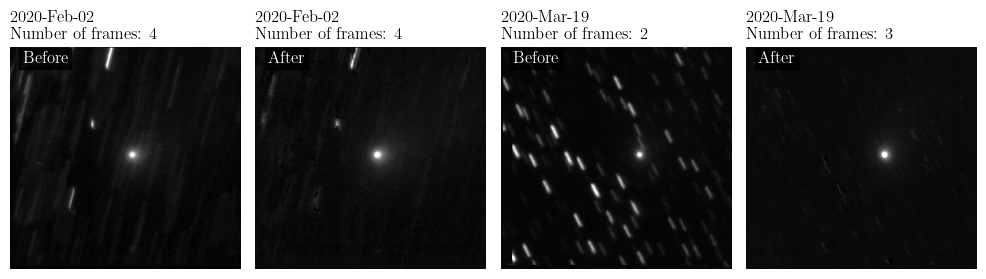

In [49]:
plt.figure(figsize=(1.5*fig_width*2,1*fig_width))
#ax1, ax2, ax3, ax4 = axes
positions = ['before', 'after', 'before', 'after']
numframes = ['4', '4', '2', '3']

props = dict(boxstyle='square', facecolor='black', alpha=0.7, pad=0.2, edgecolor='k')
stddev = 1
numlevels = 9
counter = 1
for num, (date, position) in enumerate(zip(datestoshow, positions)):
    plt.subplot(1,4,counter)
    # set differences in plotting with before and after images
    if position == 'before':
        path = './BeforeAfterImages/Dust_before/'
        filename = 'DUST_'+date+'.fits'
        captiontext = 'Before'
    elif position == 'after':
        path = './BeforeAfterImages/Dust_after/'
        filename = 'DUST_'+date+'_diff.fits'
        captiontext = 'After'

    sizestocropto = [[(50,335),(60,335)],[(50,335),(60,335)], [(30,315),(60,335)], [(30,315),(60,335)]] #[(xmin,xmax),(ymin,ymax)]
    dimensions = sizestocropto[datestoshow.index(date)]        

    hdulist = fits.open(path+filename,ignore_missing_end=True)
    imageuncrop = hdulist[0].data      
    image = imageuncrop[dimensions[1][0]:dimensions[1][1], dimensions[0][0]:dimensions[0][1]] 

    norm = ImageNormalize(data=image, interval=PercentileInterval(99.95), stretch=LinearStretch())
    im = plt.imshow(image, norm=norm, cmap='Greys_r', origin='lower')

    # Before/After annotation
    plt.text(15,255, captiontext, color='white',fontsize=12, fontweight='bold',bbox=props)

    # Number of frames annotation
    plt.title('   '+datestext[num]+'          '+'\nNumber of frames: '+numframes[num], loc='left',fontsize=12)

    # Get average angle values for the date
    table = pd.read_csv(r'./BeforeAfterImages/JPL_query_table.csv', delimiter = ',')    
    names = table['new_arcfile_name']
    rows = table[names.str.contains(date)]
    velo = rows['velocityPA']
    sun = rows['sunTargetPA']
    avvelo = 360-np.mean(velo) #degrees clockwise from north
    avsun = 360-np.mean(sun) #degrees clockwise from north

    # antisunward arrow
    start = (5,5)
    l = 40
    dx = l * np.sin(avsun* np.pi / 180)
    dy = l * np.cos(avsun* np.pi / 180) 
    #plt.arrow(start[0], start[1], dx, dy,fc='dimgrey', ec='k',head_width=7,head_length=7,width=2,length_includes_head=True)
    # -S annotation
    txtpos = (start[0]+1.1*dx, start[1]+dy*1.1)
    #plt.text(txtpos[0], txtpos[1], '-$\odot$', color='white',fontsize=12, fontweight='bold', bbox=props) #annotation for arrow

    # antivelocity arrow
    start = (5,5)
    l = 40
    dx = l * np.sin(avvelo* np.pi / 180)
    dy = l * np.cos(avvelo* np.pi / 180) 
    #plt.arrow(start[0], start[1], dx, dy,fc='white', ec='k',head_width=10,head_length=10,width=5,length_includes_head=True)
    # -v annotation
    txtpos = (start[0]+1.1*dx, start[1]+dy*1.1)
    #plt.text(txtpos[0], txtpos[1], '-V', color='white',fontsize=10, fontweight='bold', bbox = props) #annotation for arrow


    #Scale annotation
    dates_all = ['2019-11-14', '2019-11-15', '2019-11-26', '2019-12-05', '2019-12-06', '2019-12-21', '2019-12-23', '2019-12-29', '2019-12-31', '2020-02-02', '2020-02-04', '2020-02-16', '2020-02-25', '2020-02-28', '2020-03-16', '2020-03-19']
    scale_date = [31.0997061, 31.0997061, 32.9682025, 34.209806268718864, 34.328958743007014, 35.47341127722916, 35.532706858016816, 35.59324266213401, 35.57226744800711, 33.07054419420382, 32.84287518811179, 31.377380152136006, 30.253009538172453, 29.87299630886403, 27.75608220392316, 27.38499010989345] #from table of 10kkm apertures
    width = scale_date[dates_all.index(date)]
    centrepoint = 235
    #plt.arrow(centrepoint-width/2, 10, width, 0, fc='w', ec='k', head_width=0,head_length=0,width=2,length_includes_head=True)
    #plt.text(200, 20, "10,000 km", color='white',fontsize=10, fontweight='bold', bbox=props)

    plt.axis('off')
    plt.gca().set_aspect('equal')
    counter += 1
plt.tight_layout()

plt.savefig('BeforeAfter_starkiller.pdf',bbox_inches='tight')

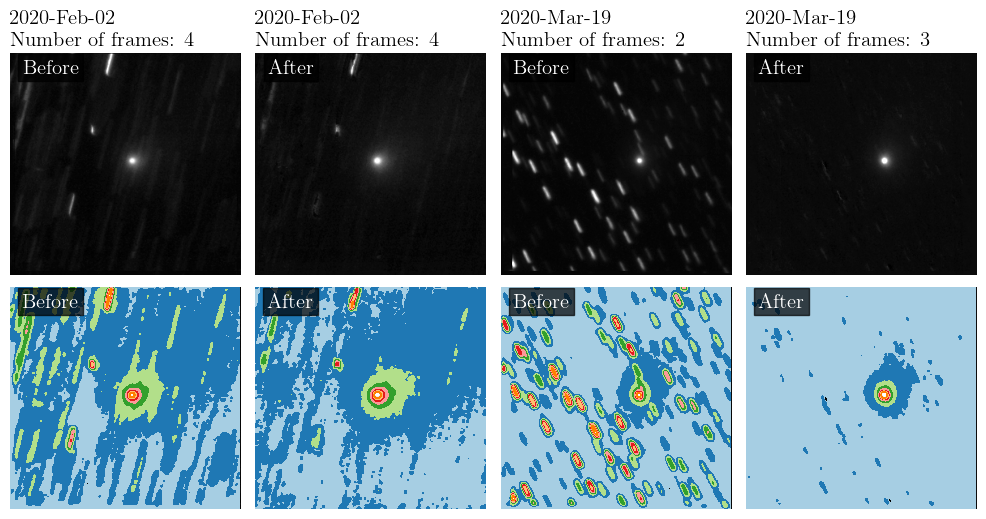

In [81]:
plt.figure(figsize=(1.5*fig_width*2,1.7*fig_width))
#ax1, ax2, ax3, ax4 = axes
positions = ['before', 'after', 'before', 'after']
numframes = ['4', '4', '2', '3']

props = dict(boxstyle='square', facecolor='black', alpha=0.7, pad=0.2, edgecolor='k')
stddev = 1
numlevels = 9
counter = 1
for num, (date, position) in enumerate(zip(datestoshow, positions)):
    plt.subplot(2,4,counter)
    # set differences in plotting with before and after images
    if position == 'before':
        path = './BeforeAfterImages/Dust_before/'
        filename = 'DUST_'+date+'.fits'
        captiontext = 'Before'
    elif position == 'after':
        path = './BeforeAfterImages/Dust_after/'
        filename = 'DUST_'+date+'_diff.fits'
        captiontext = 'After'

    sizestocropto = [[(50,335),(60,335)],[(50,335),(60,335)], [(30,315),(60,335)], [(30,315),(60,335)]] #[(xmin,xmax),(ymin,ymax)]
    dimensions = sizestocropto[datestoshow.index(date)]        

    hdulist = fits.open(path+filename,ignore_missing_end=True)
    imageuncrop = hdulist[0].data      
    image = imageuncrop[dimensions[1][0]:dimensions[1][1], dimensions[0][0]:dimensions[0][1]] 

    norm = ImageNormalize(data=image, interval=PercentileInterval(99.95), stretch=LinearStretch())
    im = plt.imshow(image, norm=norm, cmap='Greys_r', origin='lower')

    # Before/After annotation
    plt.text(15,250, captiontext, color='white',fontsize=15, fontweight='bold',bbox=props)

    # Number of frames annotation
    plt.title('   '+datestext[num]+'          '+'\nNumber of frames: '+numframes[num], loc='left',fontsize=15)

    # Get average angle values for the date
    table = pd.read_csv(r'./BeforeAfterImages/JPL_query_table.csv', delimiter = ',')    
    names = table['new_arcfile_name']
    rows = table[names.str.contains(date)]
    velo = rows['velocityPA']
    sun = rows['sunTargetPA']
    avvelo = 360-np.mean(velo) #degrees clockwise from north
    avsun = 360-np.mean(sun) #degrees clockwise from north

    # antisunward arrow
    start = (5,5)
    l = 40
    dx = l * np.sin(avsun* np.pi / 180)
    dy = l * np.cos(avsun* np.pi / 180) 
    #plt.arrow(start[0], start[1], dx, dy,fc='dimgrey', ec='k',head_width=7,head_length=7,width=2,length_includes_head=True)
    # -S annotation
    txtpos = (start[0]+1.1*dx, start[1]+dy*1.1)
    #plt.text(txtpos[0], txtpos[1], '-$\odot$', color='white',fontsize=12, fontweight='bold', bbox=props) #annotation for arrow

    # antivelocity arrow
    start = (5,5)
    l = 40
    dx = l * np.sin(avvelo* np.pi / 180)
    dy = l * np.cos(avvelo* np.pi / 180) 
    #plt.arrow(start[0], start[1], dx, dy,fc='white', ec='k',head_width=10,head_length=10,width=5,length_includes_head=True)
    # -v annotation
    txtpos = (start[0]+1.1*dx, start[1]+dy*1.1)
    #plt.text(txtpos[0], txtpos[1], '-V', color='white',fontsize=10, fontweight='bold', bbox = props) #annotation for arrow


    #Scale annotation
    dates_all = ['2019-11-14', '2019-11-15', '2019-11-26', '2019-12-05', '2019-12-06', '2019-12-21', '2019-12-23', '2019-12-29', '2019-12-31', '2020-02-02', '2020-02-04', '2020-02-16', '2020-02-25', '2020-02-28', '2020-03-16', '2020-03-19']
    scale_date = [31.0997061, 31.0997061, 32.9682025, 34.209806268718864, 34.328958743007014, 35.47341127722916, 35.532706858016816, 35.59324266213401, 35.57226744800711, 33.07054419420382, 32.84287518811179, 31.377380152136006, 30.253009538172453, 29.87299630886403, 27.75608220392316, 27.38499010989345] #from table of 10kkm apertures
    width = scale_date[dates_all.index(date)]
    centrepoint = 235
    #plt.arrow(centrepoint-width/2, 10, width, 0, fc='w', ec='k', head_width=0,head_length=0,width=2,length_includes_head=True)
    #plt.text(200, 20, "10,000 km", color='white',fontsize=10, fontweight='bold', bbox=props)

    plt.axis('off')
    plt.gca().set_aspect('equal')
    counter += 1

for num, ( date, position) in enumerate(zip( datestoshow, positions)):
    
    plt.subplot(2,4,counter)
    
    
    # set differences in plotting with before and after images
    if position == 'before':
        path = './BeforeAfterImages/Dust_before/'
        filename = 'DUST_'+date+'.fits'
        captiontext = 'Before'
    elif position == 'after':
        path = './BeforeAfterImages/Dust_after/'
        filename = 'DUST_'+date+'_diff.fits'
        captiontext = 'After'

    sizestocropto = [[(50,335),(60,335)],[(50,335),(60,335)], [(30,315),(60,335)], [(30,315),(60,335)]] #[(xmin,xmplt),(ymin,ymplt)]
    dimensions = sizestocropto[datestoshow.index(date)]        

    hdulist = fits.open(path+filename,ignore_missing_end=True)
    imageuncrop = hdulist[0].data      
    image = imageuncrop[dimensions[1][0]:dimensions[1][1], dimensions[0][0]:dimensions[0][1]] 
    #image = imagecrop[55:165,60:180]
    kernel = Gaussian2DKernel(x_stddev=stddev)
    convimage = convolve(image, kernel)

    norm = ImageNormalize(data=image, interval=PercentileInterval(99.95), stretch=LinearStretch())
    im = plt.gca().pcolorfast(image, norm=norm, cmap='Greys_r')

    convimage += abs(np.min(convimage)) #make minimum 0

    # set square root stretch
    image_min = np.percentile(convimage, 0.05)  #taking 99.5 percentile, not min/mplt
    image_mplt = np.percentile(convimage, 99.95) #taking 99.5 percentile, not min/mplt
    sqrt_min = np.sqrt(image_min)
    sqrt_mplt = np.sqrt(image_mplt)
    levels = np.linspace(sqrt_min, sqrt_mplt, numlevels)**2

    # set squared stretch
    #image_min = np.min(convimage)
    #image_mplt = np.mplt(convimage)
    #sqrd_min = (image_min)**2
    #sqrd_mplt = (image_mplt)**2
    #levels = np.sqrt(np.linspace(sqrd_min, sqrd_mplt, numlevels))

    # set custom colours from the colour map, default cmap entry skips colours due to stretch
    cmap = plt.get_cmap('Paired')
    paired_colors = [cmap(i) for i in range(24)]
    contour = plt.contourf(convimage, levels=levels, colors=paired_colors, origin='lower', zorder=1)

    # Before/After annotation
    plt.text(15,250, captiontext, color='white',fontsize=15, fontweight='bold',bbox=props)

    # Number of frames annotation
    #plt.title('   '+datestext[num]+'          '+'\nNumber of frames: '+numframes[num], loc='left',fontsize=12)

    # Get average angle values for the date
    table = pd.read_csv(r'./BeforeAfterImages/JPL_query_table.csv', delimiter = ',')    
    names = table['new_arcfile_name']
    rows = table[names.str.contains(date)]
    velo = rows['velocityPA']
    sun = rows['sunTargetPA']
    avvelo = 360-np.mean(velo) #degrees clockwise from north
    avsun = 360-np.mean(sun) #degrees clockwise from north

    # antisunward arrow
    start = (5,5)
    l = 40
    dx = l * np.sin(avsun* np.pi / 180)
    dy = l * np.cos(avsun* np.pi / 180) 
    #plt.arrow(start[0], start[1], dx, dy,fc='dimgrey', ec='k',head_width=7,head_length=7,width=2,length_includes_head=True)
    # -S annotation
    txtpos = (start[0]+1.1*dx, start[1]+dy*1.1)
   # plt.text(txtpos[0], txtpos[1], '-$\odot$', color='white',fontsize=12, fontweight='bold', bbox=props) #annotation for arrow

    # antivelocity arrow
    start = (5,5)
    l = 40
    dx = l * np.sin(avvelo* np.pi / 180)
    dy = l * np.cos(avvelo* np.pi / 180) 
    #plt.arrow(start[0], start[1], dx, dy,fc='white', ec='k',head_width=7,head_length=7,width=2,length_includes_head=True)
    # -v annotation
    txtpos = (start[0]+1.1*dx, start[1]+dy*1.1)
    #plt.text(txtpos[0], txtpos[1], '-V', color='white',fontsize=10, fontweight='bold', bbox = props) #annotation for arrow


    #Scale annotation
    dates_all = ['2019-11-14', '2019-11-15', '2019-11-26', 
                 '2019-12-05', '2019-12-06', '2019-12-21', 
                 '2019-12-23', '2019-12-29', '2019-12-31', 
                 '2020-02-02', '2020-02-04', '2020-02-16', 
                 '2020-02-25', '2020-02-28', '2020-03-16', 
                 '2020-03-19']
    
    scale_date = [31.0997061, 31.0997061, 32.9682025, 34.209806268718864, 
                  34.328958743007014, 35.47341127722916, 35.532706858016816, 
                  35.59324266213401, 35.57226744800711, 33.07054419420382, 
                  32.84287518811179, 31.377380152136006, 30.253009538172453, 
                  29.87299630886403, 27.75608220392316, 27.38499010989345] #from table of 10kkm apertures
    width = scale_date[dates_all.index(date)]
    centrepoint = 235
    #plt.arrow(centrepoint-width/2, 10, width, 0, fc='w', ec='k', head_width=0,head_length=0,width=2,length_includes_head=True)
    #plt.text(200, 20, "10,000 km", color='white',fontsize=10, fontweight='bold', bbox=props)

    plt.axis('off')
    plt.gca().set_aspect('equal')


    counter += 1

plt.tight_layout()
plt.subplots_adjust(hspace=-0.15)
#plt.subplots_adjust(wspace=+0.001)
plt.savefig('BeforeAfter_starkiller.pdf')#,bbox_inches='tight')


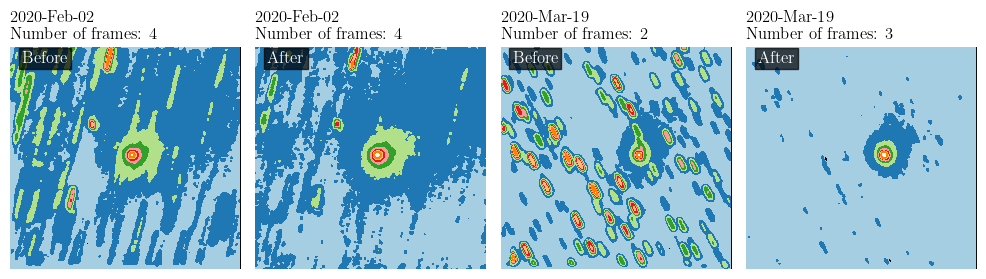

In [54]:
plt.figure(figsize=(1.5*fig_width*2,1*fig_width))
#plt1, plt2, plt3, plt4 = pltes
positions = ['before', 'after', 'before', 'after']
numframes = ['4', '4', '2', '3']

props = dict(boxstyle='square', facecolor='black', alpha=0.7, pad=0.2, edgecolor='k')
stddev = 1
numlevels = 9
counter = 1
for num, ( date, position) in enumerate(zip( datestoshow, positions)):
    plt.subplot(1,4,counter)
    # set differences in plotting with before and after images
    if position == 'before':
        path = './BeforeAfterImages/Dust_before/'
        filename = 'DUST_'+date+'.fits'
        captiontext = 'Before'
    elif position == 'after':
        path = './BeforeAfterImages/Dust_after/'
        filename = 'DUST_'+date+'_diff.fits'
        captiontext = 'After'

    sizestocropto = [[(50,335),(60,335)],[(50,335),(60,335)], [(30,315),(60,335)], [(30,315),(60,335)]] #[(xmin,xmplt),(ymin,ymplt)]
    dimensions = sizestocropto[datestoshow.index(date)]        

    hdulist = fits.open(path+filename,ignore_missing_end=True)
    imageuncrop = hdulist[0].data      
    image = imageuncrop[dimensions[1][0]:dimensions[1][1], dimensions[0][0]:dimensions[0][1]] 
    #image = imagecrop[55:165,60:180]
    kernel = Gaussian2DKernel(x_stddev=stddev)
    convimage = convolve(image, kernel)

    norm = ImageNormalize(data=image, interval=PercentileInterval(99.95), stretch=LinearStretch())
    im = plt.gca().pcolorfast(image, norm=norm, cmap='Greys_r')

    convimage += abs(np.min(convimage)) #make minimum 0

    # set square root stretch
    image_min = np.percentile(convimage, 0.05)  #taking 99.5 percentile, not min/mplt
    image_mplt = np.percentile(convimage, 99.95) #taking 99.5 percentile, not min/mplt
    sqrt_min = np.sqrt(image_min)
    sqrt_mplt = np.sqrt(image_mplt)
    levels = np.linspace(sqrt_min, sqrt_mplt, numlevels)**2

    # set squared stretch
    #image_min = np.min(convimage)
    #image_mplt = np.mplt(convimage)
    #sqrd_min = (image_min)**2
    #sqrd_mplt = (image_mplt)**2
    #levels = np.sqrt(np.linspace(sqrd_min, sqrd_mplt, numlevels))

    # set custom colours from the colour map, default cmap entry skips colours due to stretch
    cmap = plt.get_cmap('Paired')
    paired_colors = [cmap(i) for i in range(24)]
    contour = plt.contourf(convimage, levels=levels, colors=paired_colors, origin='lower', zorder=1)

    # Before/After annotation
    plt.text(15,255, captiontext, color='white',fontsize=12, fontweight='bold',bbox=props)

    # Number of frames annotation
    plt.title('   '+datestext[num]+'          '+'\nNumber of frames: '+numframes[num], loc='left',fontsize=12)

    # Get average angle values for the date
    table = pd.read_csv(r'./BeforeAfterImages/JPL_query_table.csv', delimiter = ',')    
    names = table['new_arcfile_name']
    rows = table[names.str.contains(date)]
    velo = rows['velocityPA']
    sun = rows['sunTargetPA']
    avvelo = 360-np.mean(velo) #degrees clockwise from north
    avsun = 360-np.mean(sun) #degrees clockwise from north

    # antisunward arrow
    start = (5,5)
    l = 40
    dx = l * np.sin(avsun* np.pi / 180)
    dy = l * np.cos(avsun* np.pi / 180) 
    #plt.arrow(start[0], start[1], dx, dy,fc='dimgrey', ec='k',head_width=7,head_length=7,width=2,length_includes_head=True)
    # -S annotation
    txtpos = (start[0]+1.1*dx, start[1]+dy*1.1)
   # plt.text(txtpos[0], txtpos[1], '-$\odot$', color='white',fontsize=12, fontweight='bold', bbox=props) #annotation for arrow

    # antivelocity arrow
    start = (5,5)
    l = 40
    dx = l * np.sin(avvelo* np.pi / 180)
    dy = l * np.cos(avvelo* np.pi / 180) 
    #plt.arrow(start[0], start[1], dx, dy,fc='white', ec='k',head_width=7,head_length=7,width=2,length_includes_head=True)
    # -v annotation
    txtpos = (start[0]+1.1*dx, start[1]+dy*1.1)
    #plt.text(txtpos[0], txtpos[1], '-V', color='white',fontsize=10, fontweight='bold', bbox = props) #annotation for arrow


    #Scale annotation
    dates_all = ['2019-11-14', '2019-11-15', '2019-11-26', 
                 '2019-12-05', '2019-12-06', '2019-12-21', 
                 '2019-12-23', '2019-12-29', '2019-12-31', 
                 '2020-02-02', '2020-02-04', '2020-02-16', 
                 '2020-02-25', '2020-02-28', '2020-03-16', 
                 '2020-03-19']
    
    scale_date = [31.0997061, 31.0997061, 32.9682025, 34.209806268718864, 
                  34.328958743007014, 35.47341127722916, 35.532706858016816, 
                  35.59324266213401, 35.57226744800711, 33.07054419420382, 
                  32.84287518811179, 31.377380152136006, 30.253009538172453, 
                  29.87299630886403, 27.75608220392316, 27.38499010989345] #from table of 10kkm apertures
    width = scale_date[dates_all.index(date)]
    centrepoint = 235
    #plt.arrow(centrepoint-width/2, 10, width, 0, fc='w', ec='k', head_width=0,head_length=0,width=2,length_includes_head=True)
    #plt.text(200, 20, "10,000 km", color='white',fontsize=10, fontweight='bold', bbox=props)

    plt.axis('off')
    plt.gca().set_aspect('equal')

    plt.tight_layout()
    counter += 1

#plt.savefig('./figures/BeforeAfter_hist_captions.pdf')


In [ ]:



def plot_beforeafter_hist():
    fig, axes = plt.subplots(1,4,figsize=(15,4))
    ax1, ax2, ax3, ax4 = axes
    positions = ['before', 'after', 'before', 'after']
    numframes = ['4', '4', '2', '3']
    
    props = dict(boxstyle='square', facecolor='black', alpha=0.7, pad=0.2, edgecolor='k')
    stddev = 1
    numlevels = 9
    
    for num, (ax, date, position) in enumerate(zip(axes, datestoshow, positions)):
        
        # set differences in plotting with before and after images
        if position == 'before':
            path = './Dust_before/'
            filename = 'DUST_'+date+'.fits'
            captiontext = 'Before'
        elif position == 'after':
            path = './Dust_after/'
            filename = 'DUST_'+date+'_diff.fits'
            captiontext = 'After'

        sizestocropto = [[(50,335),(60,335)],[(50,335),(60,335)], [(30,315),(60,335)], [(30,315),(60,335)]] #[(xmin,xmax),(ymin,ymax)]
        dimensions = sizestocropto[datestoshow.index(date)]        

        hdulist = fits.open(path+filename,ignore_missing_end=True)
        imageuncrop = hdulist[0].data      
        image = imageuncrop[dimensions[1][0]:dimensions[1][1], dimensions[0][0]:dimensions[0][1]] 
        #image = imagecrop[55:165,60:180]
        kernel = Gaussian2DKernel(x_stddev=stddev)
        convimage = convolve(image, kernel)
    
        norm = ImageNormalize(data=image, interval=PercentileInterval(99.95), stretch=LinearStretch())
        im = ax.pcolorfast(image, norm=norm, cmap='Greys_r')
        
        convimage += abs(np.min(convimage)) #make minimum 0
        
        # set square root stretch
        image_min = np.percentile(convimage, 0.05)  #taking 99.5 percentile, not min/max
        image_max = np.percentile(convimage, 99.95) #taking 99.5 percentile, not min/max
        sqrt_min = np.sqrt(image_min)
        sqrt_max = np.sqrt(image_max)
        levels = np.linspace(sqrt_min, sqrt_max, numlevels)**2
        
        # set squared stretch
        #image_min = np.min(convimage)
        #image_max = np.max(convimage)
        #sqrd_min = (image_min)**2
        #sqrd_max = (image_max)**2
        #levels = np.sqrt(np.linspace(sqrd_min, sqrd_max, numlevels))
              
        # set custom colours from the colour map, default cmap entry skips colours due to stretch
        cmap = plt.get_cmap('Paired')
        paired_colors = [cmap(i) for i in range(24)]
        contour = ax.contourf(convimage, levels=levels, colors=paired_colors, origin='lower', zorder=1)

        # Before/After annotation
        ax.text(15,255, captiontext, color='white',fontsize=16, fontweight='bold',bbox=props)
        
        # Number of frames annotation
        ax.set_title('   '+datestext[num]+'          '+'Number of frames: '+numframes[num], loc='left')
        
        # Get average angle values for the date
        table = pd.read_csv(r'./JPL_query_table.csv', delimiter = ',')    
        names = table['new_arcfile_name']
        rows = table[names.str.contains(date)]
        velo = rows['velocityPA']
        sun = rows['sunTargetPA']
        avvelo = 360-np.mean(velo) #degrees clockwise from north
        avsun = 360-np.mean(sun) #degrees clockwise from north
        
        # antisunward arrow
        start = (5,5)
        l = 40
        dx = l * np.sin(avsun* np.pi / 180)
        dy = l * np.cos(avsun* np.pi / 180) 
        ax.arrow(start[0], start[1], dx, dy,fc='dimgrey', ec='k',head_width=7,head_length=7,width=2,length_includes_head=True)
        # -S annotation
        txtpos = (start[0]+1.1*dx, start[1]+dy*1.1)
        ax.text(txtpos[0], txtpos[1], '-$\odot$', color='white',fontsize=12, fontweight='bold', bbox=props) #annotation for arrow
        
        # antivelocity arrow
        start = (5,5)
        l = 40
        dx = l * np.sin(avvelo* np.pi / 180)
        dy = l * np.cos(avvelo* np.pi / 180) 
        ax.arrow(start[0], start[1], dx, dy,fc='white', ec='k',head_width=7,head_length=7,width=2,length_includes_head=True)
        # -v annotation
        txtpos = (start[0]+1.1*dx, start[1]+dy*1.1)
        ax.text(txtpos[0], txtpos[1], '-V', color='white',fontsize=10, fontweight='bold', bbox = props) #annotation for arrow
    

        #Scale annotation
        dates_all = ['2019-11-14', '2019-11-15', '2019-11-26', '2019-12-05', '2019-12-06', '2019-12-21', '2019-12-23', '2019-12-29', '2019-12-31', '2020-02-02', '2020-02-04', '2020-02-16', '2020-02-25', '2020-02-28', '2020-03-16', '2020-03-19']
        scale_date = [31.0997061, 31.0997061, 32.9682025, 34.209806268718864, 34.328958743007014, 35.47341127722916, 35.532706858016816, 35.59324266213401, 35.57226744800711, 33.07054419420382, 32.84287518811179, 31.377380152136006, 30.253009538172453, 29.87299630886403, 27.75608220392316, 27.38499010989345] #from table of 10kkm apertures
        width = scale_date[dates_all.index(date)]
        centrepoint = 235
        ax.arrow(centrepoint-width/2, 10, width, 0, fc='w', ec='k', head_width=0,head_length=0,width=2,length_includes_head=True)
        ax.text(200, 20, "10,000 km", color='white',fontsize=10, fontweight='bold', bbox=props)
        
        ax.axis('off')
        ax.set_aspect('equal')
        
        plt.tight_layout()
        
    plt.savefig('./figures/BeforeAfter_hist_captions.pdf')
        
    return 

def plot_beforeafter():
    fig, axes = plt.subplots(1,4,figsize=(15,4))
    ax1, ax2, ax3, ax4 = axes
    positions = ['before', 'after', 'before', 'after']
    numframes = ['4', '4', '2', '3']
    
    props = dict(boxstyle='square', facecolor='black', alpha=0.7, pad=0.2, edgecolor='k')
    stddev = 1
    numlevels = 9
    
    for num, (ax, date, position) in enumerate(zip(axes, datestoshow, positions)):
        
        # set differences in plotting with before and after images
        if position == 'before':
            path = './Dust_before/'
            filename = 'DUST_'+date+'.fits'
            captiontext = 'Before'
        elif position == 'after':
            path = './Dust_after/'
            filename = 'DUST_'+date+'_diff.fits'
            captiontext = 'After'

        sizestocropto = [[(50,335),(60,335)],[(50,335),(60,335)], [(30,315),(60,335)], [(30,315),(60,335)]] #[(xmin,xmax),(ymin,ymax)]
        dimensions = sizestocropto[datestoshow.index(date)]        

        hdulist = fits.open(path+filename,ignore_missing_end=True)
        imageuncrop = hdulist[0].data      
        image = imageuncrop[dimensions[1][0]:dimensions[1][1], dimensions[0][0]:dimensions[0][1]] 
    
        norm = ImageNormalize(data=image, interval=PercentileInterval(99.95), stretch=LinearStretch())
        im = ax.imshow(image, norm=norm, cmap='Greys_r', origin='lower')

        # Before/After annotation
        ax.text(15,255, captiontext, color='white',fontsize=16, fontweight='bold',bbox=props)
        
        # Number of frames annotation
        ax.set_title('   '+datestext[num]+'          '+'Number of frames: '+numframes[num], loc='left')
        
        # Get average angle values for the date
        table = pd.read_csv(r'./JPL_query_table.csv', delimiter = ',')    
        names = table['new_arcfile_name']
        rows = table[names.str.contains(date)]
        velo = rows['velocityPA']
        sun = rows['sunTargetPA']
        avvelo = 360-np.mean(velo) #degrees clockwise from north
        avsun = 360-np.mean(sun) #degrees clockwise from north
        
        # antisunward arrow
        start = (5,5)
        l = 40
        dx = l * np.sin(avsun* np.pi / 180)
        dy = l * np.cos(avsun* np.pi / 180) 
        ax.arrow(start[0], start[1], dx, dy,fc='dimgrey', ec='k',head_width=7,head_length=7,width=2,length_includes_head=True)
        # -S annotation
        txtpos = (start[0]+1.1*dx, start[1]+dy*1.1)
        ax.text(txtpos[0], txtpos[1], '-$\odot$', color='white',fontsize=12, fontweight='bold', bbox=props) #annotation for arrow
        
        # antivelocity arrow
        start = (5,5)
        l = 40
        dx = l * np.sin(avvelo* np.pi / 180)
        dy = l * np.cos(avvelo* np.pi / 180) 
        ax.arrow(start[0], start[1], dx, dy,fc='white', ec='k',head_width=7,head_length=7,width=2,length_includes_head=True)
        # -v annotation
        txtpos = (start[0]+1.1*dx, start[1]+dy*1.1)
        ax.text(txtpos[0], txtpos[1], '-V', color='white',fontsize=10, fontweight='bold', bbox = props) #annotation for arrow
    

        #Scale annotation
        dates_all = ['2019-11-14', '2019-11-15', '2019-11-26', '2019-12-05', '2019-12-06', '2019-12-21', '2019-12-23', '2019-12-29', '2019-12-31', '2020-02-02', '2020-02-04', '2020-02-16', '2020-02-25', '2020-02-28', '2020-03-16', '2020-03-19']
        scale_date = [31.0997061, 31.0997061, 32.9682025, 34.209806268718864, 34.328958743007014, 35.47341127722916, 35.532706858016816, 35.59324266213401, 35.57226744800711, 33.07054419420382, 32.84287518811179, 31.377380152136006, 30.253009538172453, 29.87299630886403, 27.75608220392316, 27.38499010989345] #from table of 10kkm apertures
        width = scale_date[dates_all.index(date)]
        centrepoint = 235
        ax.arrow(centrepoint-width/2, 10, width, 0, fc='w', ec='k', head_width=0,head_length=0,width=2,length_includes_head=True)
        ax.text(200, 20, "10,000 km", color='white',fontsize=10, fontweight='bold', bbox=props)
        
        ax.axis('off')
        ax.set_aspect('equal')
        
        plt.tight_layout()
        
    plt.savefig('./figures/BeforeAfter_captions.pdf')
        
    return 

def plot_beforeafter_image_and_hist():
    fig, axes = plt.subplots(2,4,figsize=(15,8))
    
    axs = axes[0] # top row
    positions = ['before', 'after', 'before', 'after']
    numframes = ['4', '4', '2', '3']
    
    props = dict(boxstyle='square', facecolor='black', alpha=0.7, pad=0.2, edgecolor='k')
    stddev = 1
    numlevels = 9
    
    for num, (ax, date, position) in enumerate(zip(axs, datestoshow, positions)):
        
        # set differences in plotting with before and after images
        if position == 'before':
            path = './Dust_before/'
            filename = 'DUST_'+date+'.fits'
            captiontext = 'Before'
        elif position == 'after':
            path = './Dust_after/'
            filename = 'DUST_'+date+'_diff.fits'
            captiontext = 'After'

        sizestocropto = [[(50,335),(60,335)],[(50,335),(60,335)], [(30,315),(60,335)], [(30,315),(60,335)]] #[(xmin,xmax),(ymin,ymax)]
        dimensions = sizestocropto[datestoshow.index(date)]        

        hdulist = fits.open(path+filename,ignore_missing_end=True)
        imageuncrop = hdulist[0].data      
        image = imageuncrop[dimensions[1][0]:dimensions[1][1], dimensions[0][0]:dimensions[0][1]] 
    
        norm = ImageNormalize(data=image, interval=PercentileInterval(99.95), stretch=LinearStretch())
        im = ax.imshow(image, norm=norm, cmap='Greys_r', origin='lower')

        # Before/After annotation
        ax.text(15,250, captiontext, color='white',fontsize=16, fontweight='bold',bbox=props)
        
        # Number of frames annotation
        ax.set_title('   '+datestext[num]+'       '+'Number of frames: '+numframes[num], loc='left')
        
        ax.axis('off')
        ax.set_aspect('equal')
        
        plt.tight_layout()

    axs = axes[1] #second row
    positions = ['before', 'after', 'before', 'after']
    numframes = ['4', '4', '2', '3']
    
    props = dict(boxstyle='square', facecolor='black', alpha=0.7, pad=0.2, edgecolor='k')
    stddev = 1
    numlevels = 9
    
    for num, (ax, date, position) in enumerate(zip(axs, datestoshow, positions)):
        
        # set differences in plotting with before and after images
        if position == 'before':
            path = './Dust_before/'
            filename = 'DUST_'+date+'.fits'
            captiontext = 'Before'
        elif position == 'after':
            path = './Dust_after/'
            filename = 'DUST_'+date+'_diff.fits'
            captiontext = 'After'

        sizestocropto = [[(50,335),(60,335)],[(50,335),(60,335)], [(30,315),(60,335)], [(30,315),(60,335)]] #[(xmin,xmax),(ymin,ymax)]
        dimensions = sizestocropto[datestoshow.index(date)]        

        hdulist = fits.open(path+filename,ignore_missing_end=True)
        imageuncrop = hdulist[0].data      
        image = imageuncrop[dimensions[1][0]:dimensions[1][1], dimensions[0][0]:dimensions[0][1]] 
        #image = imagecrop[55:165,60:180]
        kernel = Gaussian2DKernel(x_stddev=stddev)
        convimage = convolve(image, kernel)
    
        norm = ImageNormalize(data=image, interval=PercentileInterval(99.95), stretch=LinearStretch())
        im = ax.pcolorfast(image, norm=norm, cmap='Greys_r')
        
        convimage += abs(np.min(convimage)) #make minimum 0
        
        # set square root stretch
        image_min = np.percentile(convimage, 0.05)  #taking 99.5 percentile, not min/max
        image_max = np.percentile(convimage, 99.95) #taking 99.5 percentile, not min/max
        sqrt_min = np.sqrt(image_min)
        sqrt_max = np.sqrt(image_max)
        levels = np.linspace(sqrt_min, sqrt_max, numlevels)**2
        
        # set squared stretch
        #image_min = np.min(convimage)
        #image_max = np.max(convimage)
        #sqrd_min = (image_min)**2
        #sqrd_max = (image_max)**2
        #levels = np.sqrt(np.linspace(sqrd_min, sqrd_max, numlevels))
              
        # set custom colours from the colour map, default cmap entry skips colours due to stretch
        cmap = plt.get_cmap('Paired')
        paired_colors = [cmap(i) for i in range(24)]
        contour = ax.contourf(convimage, levels=levels, colors=paired_colors, origin='lower', zorder=1)

        # Before/After annotation
        ax.text(15,250, captiontext, color='white',fontsize=16, fontweight='bold',bbox=props)
        
        # Number of frames annotation
        ax.set_title('   '+datestext[num]+'       '+'Number of frames: '+numframes[num], loc='left')
        
        ax.axis('off')
        ax.set_aspect('equal')
        
    # plt.subplot_tool()
    # plt.show()
    plt.subplots_adjust(wspace=0.05, hspace=0.1, left=0.02,  bottom=0.01)
    plt.savefig('./figures/BeforeAfter_fourimages.pdf')
    return

plot_beforeafter()
plot_beforeafter_hist()
plot_beforeafter_image_and_hist()
